## Name: Param Chordiya
## Roll number: 32119
## AI ML

Assignment 1

Compute Estimators of the main statistical measures like Mean, Variance, Standard Deviation, Covariance, Correlation and Standard error with respect to any example. Display graphically the distribution of samples.

1. Download weight-height.csv
2. Load this data in python.
3. Calculate for both Height and Weight variable.    
    A. Mean
    B. median
    C. mode
    D. Variance
    E. Standard Deviation
    F. Standard Error
4. Plot the data, Mean, Median, and Mode on top of frequency distribution of weight and height.
5. Plot the Scatter plot with respect to height and weight
6. Calculate Covariance and Correlation of the two variables.

In [8]:
import pandas as pd
import numpy as np
import statistics
import math
from matplotlib import pyplot as plt
%matplotlib inline

1. Download weight-height.csv
2. Load this data in python.

In [3]:
df = pd.read_csv('D:\AI ML Honors\Computational Programming Lab\weight-height.csv')
print(df)
df.describe()

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


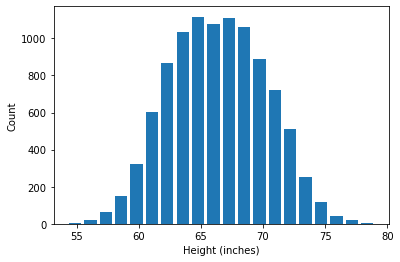

In [4]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

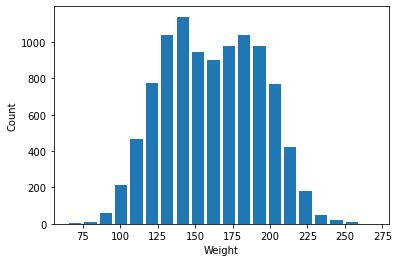

In [5]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

3. Calculate for both Height and Weight variable.    
    A. Mean
    B. median
    C. mode
    D. Variance
    E. Standard Deviation
    F. Standard Error

Mean

The arithmetic mean of a given data is the sum of all observations divided by the number of observations.

In [12]:
mean_height = statistics.mean(df.Height)
print("Mean Height = %f" %mean_height)
mean_weight = statistics.mean(df.Weight)
print("Mean Weight = %f" %mean_weight)

Mean Height = 66.367560
Mean Weight = 161.440357


Median

The value of the middlemost observation, obtained after arranging the data in ascending order, is called the median of the data.

In [13]:
median_height = statistics.median(df.Height)
print("Median Height = %f" %median_height)
median_weight = statistics.median(df.Weight)
print("Median Weight = %f" %median_weight)

Median Height = 66.318070
Median Weight = 161.212928


Mode

The value which appears most often in the given data i.e. the observation with the highest frequency is called a mode of data.

In [14]:
mode_height = statistics.mode(df.Height)
print("Mode Height = %f" %mode_height)
mode_weight = statistics.mode(df.Weight)
print("Mode Weight = %f" %mode_weight)

Mode Height = 73.847017
Mode Weight = 241.893563


Variance

The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set.

In [15]:
variance_height = statistics.pvariance(df.Height)
print("Variance Height = %f" %variance_height)
variance_weight = statistics.pvariance(df.Weight)
print("Variance Weight = %f" %variance_weight)

Variance Height = 14.801992
Variance Weight = 1030.848760


Standard Deviation

A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean. The standard deviation is calculated as the square root of variance by determining each data point's deviation relative to the mean.

In [17]:
std_deviation_height = statistics.pstdev(df.Height)
print("Standard Deviation Height = %f" %std_deviation_height)
std_deviation_weight = statistics.pstdev(df.Weight)
print("Standard Deviation Weight = %f" %std_deviation_weight)

Standard Deviation Height = 3.847336
Standard Deviation Weight = 32.106834


Standard Error

The standard error is a statistical term that measures the accuracy with which a sample distribution represents a population by using standard deviation. In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error of the mean.

In [24]:
std_error_height = np.std(df.Height, ddof=1) / np.sqrt(len(df.Height))
print("Standard Error Height = %f" %std_error_height)
std_error_weight = np.std(df.Weight, ddof=1) / np.sqrt(len(df.Weight))
print("Standard Error Weight = %f" %std_error_weight)

Standard Error Height = 0.038475
Standard Error Weight = 0.321084


5. Plot the Scatter plot with respect to height and weight

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [30]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

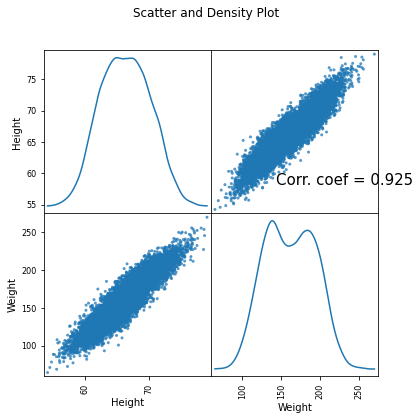

In [31]:
plotScatterMatrix(df, 6, 15)

6. Calculate Covariance and Correlation of the two variables.

Covariance

In [39]:
covariance = df.cov()
print(covariance['Height'].iloc[1])

114.24265644646306


Correlation

In [40]:
correlation = df.corr()
print(correlation['Height'].iloc[1])

0.9247562987409196


In [34]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'weight-height.csv'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

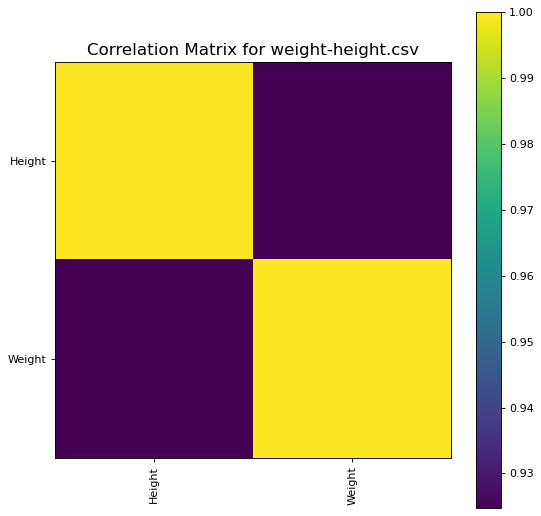

In [35]:
plotCorrelationMatrix(df, 8)